In [2]:
from resemblyzer import preprocess_wav, VoiceEncoder
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from umap import UMAP

In [4]:
colors = matplotlib.colors.cnames.values()

In [5]:
def plot_projections(embeds, speakers, ax=None, colors=None, markers=None, legend=True, 
                     title="", **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(12, 12))
        
    # Compute the 2D projections. You could also project to another number of dimensions (e.g. 
    # for a 3D plot) or use a different different dimensionality reduction like PCA or TSNE.
    reducer = UMAP(**kwargs)
    projs = reducer.fit_transform(embeds)
    
    # Draw the projections
    speakers = np.array(speakers)
    colors = list(matplotlib.colors.cnames.values())
    for i, speaker in enumerate(np.unique(speakers)):
        speaker_projs = projs[speakers == speaker]
        marker = "o" if markers is None else markers[i]
        label = speaker if legend else None
        ax.scatter(*speaker_projs.T, c=colors[i], marker=marker, label=label)

    if legend:
        ax.legend(title="Speakers", ncol=2, bbox_to_anchor=(-0.1, 1))
    ax.set_title('jvs-parallel')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("equal")
    
    plt.savefig('jvs.png')
    
    return projs

In [6]:
wav_fpaths = list(Path("D:/dataset/seiyu").glob("**/*.wav"))
#wav_fpaths = list(Path("D:/dataset/jvs_ver1").glob("**/parallel100/wav24kHz16bit/*.wav"))

In [7]:
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem.split('_')[0], wav_fpaths))
#speakers = list(map(lambda wav_fpath: wav_fpath.parent.parent.parent.stem.split('_')[0], wav_fpaths))

In [8]:
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths)))))

Preprocessing wavs: 100%|██████████| 300/300 [01:29<00:00,  2.82it/s]


In [9]:
wavs[0].shape

(108480,)

In [10]:
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

In [11]:
## Compute the embeddings
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

Loaded the voice encoder model on cuda in 1.88 seconds.


In [12]:
np.linalg.norm(utterance_embeds[0], ord=2)

1.0

In [13]:
utterance_embeds.shape

(300, 256)

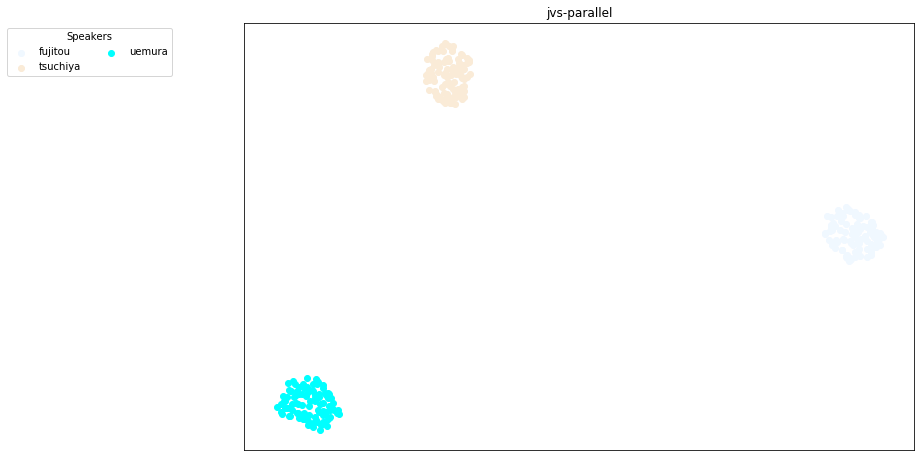

In [14]:
# Project the embeddings in 2D space
plot_projections(utterance_embeds, speakers, title="Embedding projections")
plt.show()